# Testing Slow Counter
We analyze the architecture of the proposed Slow Counter and test its behavior.

The main idea behind the slow counter is that if we know that count pulses will appear in a low frequency we can take a number of cycles to compute the next state.

In [13]:
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab. Installing HP Counters...")
    !pip install git+https://github.com/davidcastells/HPCounters.git
    !pip install wavedrom
else:
    print("Not running in Google Colab. Skipping installation.")
    if not('../..' in sys.path):
        sys.path.append('../..')

Not running in Google Colab. Skipping installation.


In [16]:
from HPSlow.SlowCounter import SlowCounter
import py4hw
import wavedrom

In [17]:
hw = py4hw.HWSystem()

reset = hw.wire('reset')
inc = hw.wire('inc')
q_slow = hw.wire('q_slow', 4)
q_std = hw.wire('q_std', 4) 

py4hw.Sequence(hw, 'inc', [1], inc)
py4hw.Sequence(hw, 'reset', [0], reset)

counter = py4hw.Counter(hw, 'Counter', reset, inc, q_std)
counter_slow = SlowCounter(hw, 'Counter_slow', reset, inc, q_slow)


## An Standard Counter
An standard counter is composed of a register and a combinational circuit that computes the next state (q+1).

When the inc pulse arrives, the next state is load into the register.

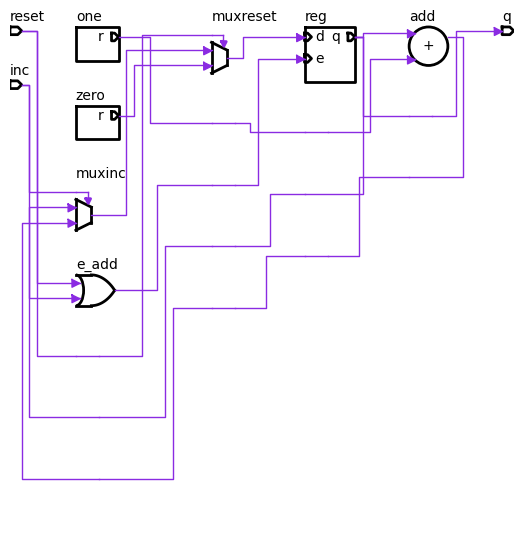

In [18]:
sch = py4hw.Schematic(counter)
sch.draw()

## A Slow Counter
The idea is that we add D flip-flops in the carry path.

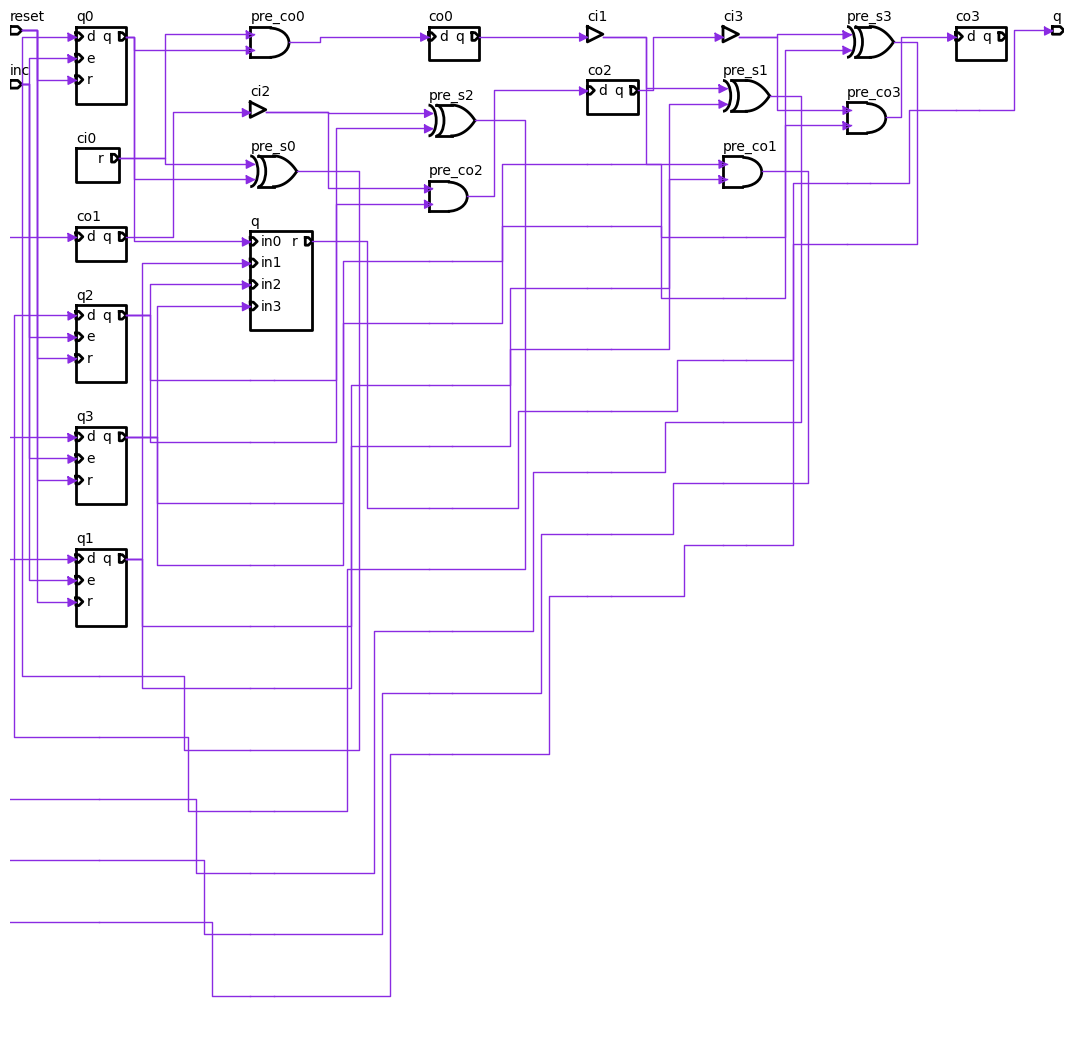

In [19]:
sch = py4hw.Schematic(counter_slow)
sch.draw()

## Simulation with high frequency increment pulses

When the increment pulses have a high enough frequency, the slow counter does not work!


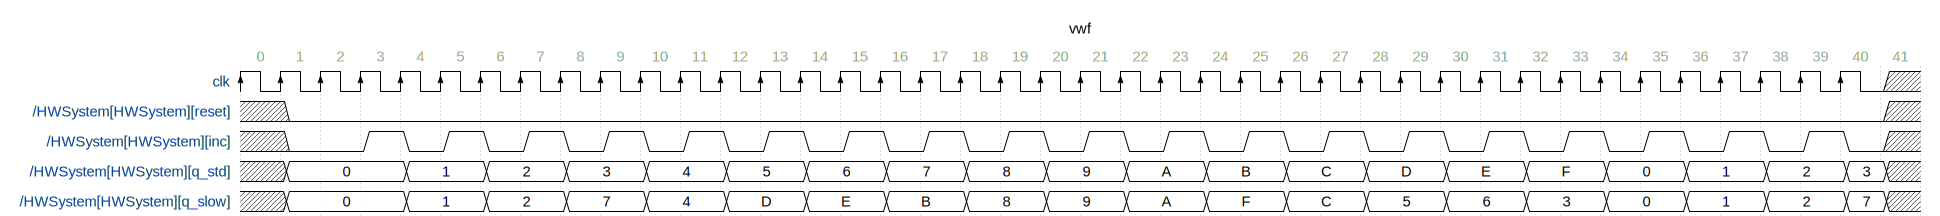

In [20]:
hw = py4hw.HWSystem()

reset = hw.wire('reset')
inc = hw.wire('inc')
q_slow = hw.wire('q_slow', 4)
q_std = hw.wire('q_std', 4) 

py4hw.Sequence(hw, 'inc', [0, 1], inc)
py4hw.Sequence(hw, 'reset', [0], reset)

counter = py4hw.Counter(hw, 'Counter', reset, inc, q_std)
counter_slow = SlowCounter(hw, 'Counter_slow', reset, inc, q_slow)

wvf = py4hw.Waveform(hw, 'vwf', [reset, inc, q_std, q_slow])
hw.getSimulator().clk(40)
wavedrom.render(str(wvf.get_wavedrom()))

## Simulation with slow increment pulses
When the increment pulses have a low frequency, the counter has enough time to precompute the next value, and then it works perfectly well.

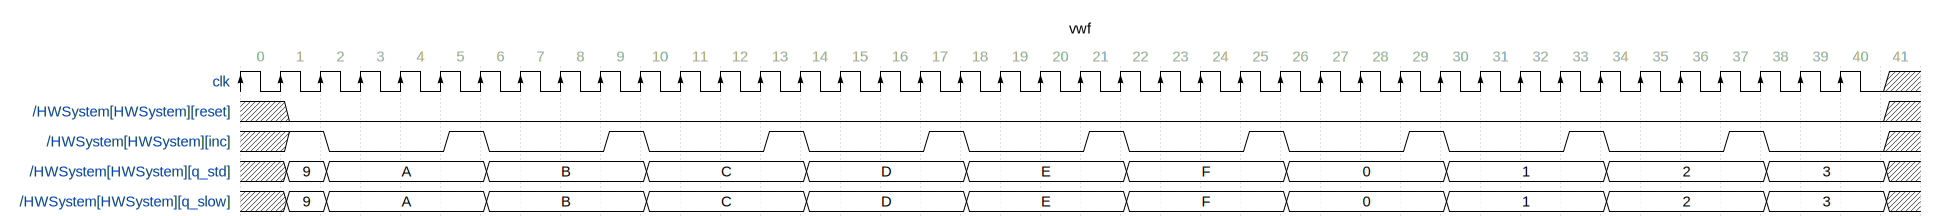

In [21]:
hw = py4hw.HWSystem()

reset = hw.wire('reset')
inc = hw.wire('inc')
q_slow = hw.wire('q_slow', 4)
q_std = hw.wire('q_std', 4) 

py4hw.Sequence(hw, 'inc', [0,0,0,  1], inc)
py4hw.Sequence(hw, 'reset', [0], reset)

counter = py4hw.Counter(hw, 'Counter', reset, inc, q_std)
counter_slow = SlowCounter(hw, 'Counter_slow', reset, inc, q_slow)

wvf = py4hw.Waveform(hw, 'vwf', [reset, inc, q_std, q_slow])
hw.getSimulator().clk(40)
wvf.clear()
hw.getSimulator().clk(40)
wavedrom.render(str(wvf.get_wavedrom()))